### Forecasting Timeseries Data Using Facebook FbProphet¶

Steps Required With FbProphet

- Introduction And Installation
- Data Preprocessing With Time Seires
- Model Fitting
- Obtaining The Forecasts
- Plotting The Forecasts
- Cross Validation
- Computing Performance Metrics
- Visualize the Performance Metrics
- Conclusions

In [61]:
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [63]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [64]:
df.drop(168,axis=0,inplace= True)

In [65]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [66]:
df.columns = ['Date','Y']

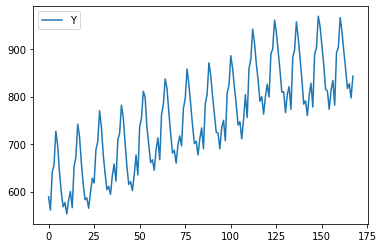

In [67]:
df.plot()

In [68]:
df.head()

,Date,Y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [69]:
df['Date']=pd.to_datetime(df['Date'])

In [70]:
df.head()

,Date,Y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


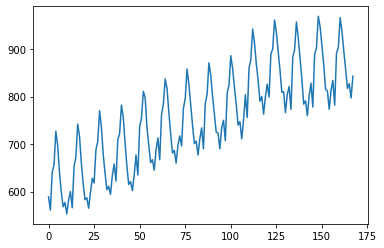

In [71]:
df.Y.plot()

In [21]:
## Shifting is to make it stationary
# df['Y']=df['Y']-df['Y'].shift(1)

In [72]:
df.head()

,Date,Y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


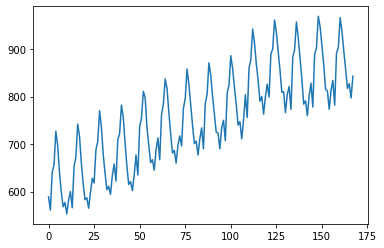

In [73]:
df.Y.plot()

In [74]:
from fbprophet import Prophet


In [75]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [76]:
df.columns=['ds','y']

In [77]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [78]:
### Initilize the model
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\users\admin\anaconda3\envs\pyfacebook\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [79]:
model

In [80]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [81]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [82]:
### Create a future date of 365 days
future_dates=model.make_future_dataframe(periods=365)
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [83]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [84]:
# Predication
predicted=model.predict(future_dates)
predicted.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.810747,577.262385,596.947774,606.810747,606.810747,-20.113596,-20.113596,-20.113596,-20.113596,-20.113596,-20.113596,0.0,0.0,0.0,586.697151
1,1962-02-01,608.536993,536.074264,555.626505,608.536993,608.536993,-62.537855,-62.537855,-62.537855,-62.537855,-62.537855,-62.537855,0.0,0.0,0.0,545.999137
2,1962-03-01,610.096182,631.104548,650.550562,610.096182,610.096182,31.410418,31.410418,31.410418,31.410418,31.410418,31.410418,0.0,0.0,0.0,641.506601
3,1962-04-01,611.822427,649.246814,668.440914,611.822427,611.822427,46.733066,46.733066,46.733066,46.733066,46.733066,46.733066,0.0,0.0,0.0,658.555494
4,1962-05-01,613.492987,712.335690,731.267301,613.492987,613.492987,108.064296,108.064296,108.064296,108.064296,108.064296,108.064296,0.0,0.0,0.0,721.557284


In [85]:
predicted[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.561801,804.153772,826.980766
529,1976-11-27,818.770979,807.320836,829.240202
530,1976-11-28,822.159021,811.457110,833.882393
531,1976-11-29,825.663235,814.105589,837.721141
532,1976-11-30,829.213819,818.045268,840.586674


In [86]:
predicted[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.697151,577.262385,596.947774
1,1962-02-01,545.999137,536.074264,555.626505
2,1962-03-01,641.506601,631.104548,650.550562
3,1962-04-01,658.555494,649.246814,668.440914
4,1962-05-01,721.557284,712.335690,731.267301


### Plot the predicated projection
Plotting the Forecasts
Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

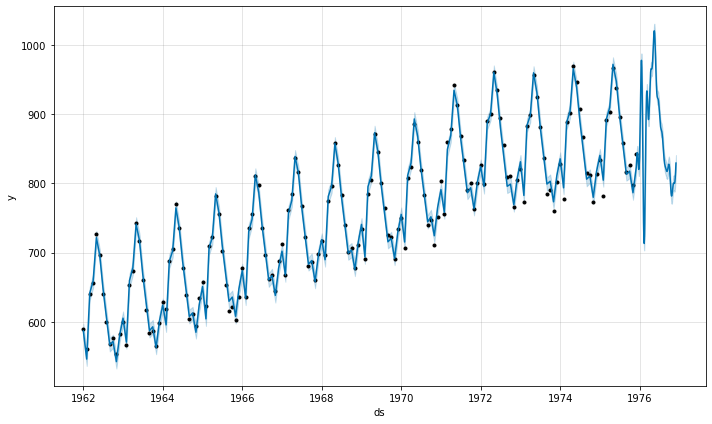

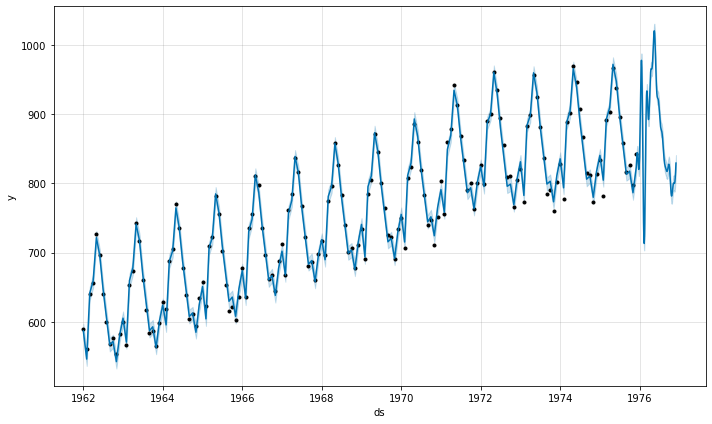

In [87]:
model.plot(predicted)

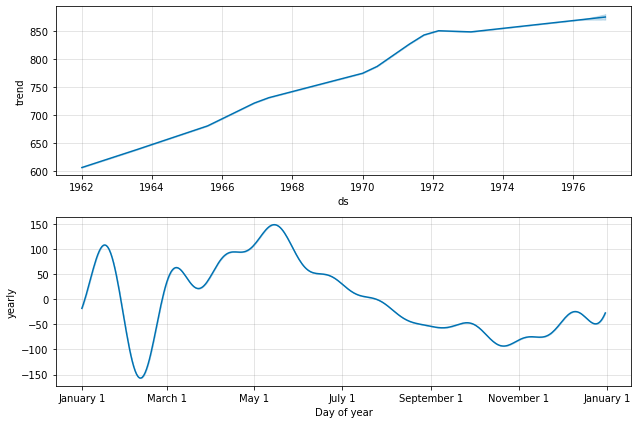

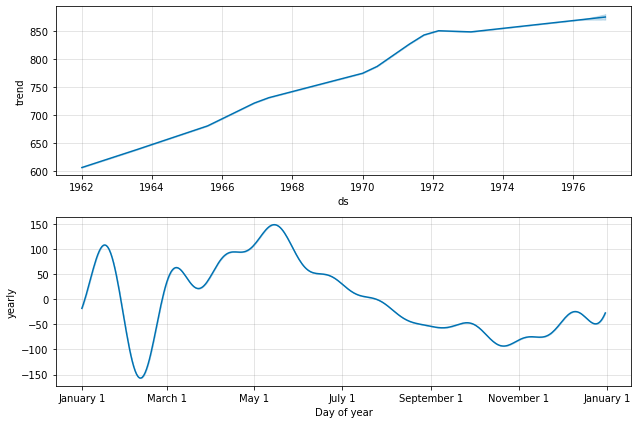

In [88]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(predicted)

In [89]:
df.shape

(168, 2)

#### Cross Validation

In [90]:
from fbprophet.diagnostics import cross_validation

In [91]:
df_cv=cross_validation(model,horizon='365 days',period='180 days',initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00
c:\users\admin\anaconda3\envs\pyfacebook\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [92]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,629.706391,627.893349,631.473844,622.0,1965-01-22
1,1965-03-01,712.739970,706.826685,718.295357,709.0,1965-01-22
2,1965-04-01,731.118164,718.958416,742.723764,722.0,1965-01-22
3,1965-05-01,800.091760,778.991650,817.816201,782.0,1965-01-22
4,1965-06-01,768.349331,736.940434,794.132029,756.0,1965-01-22


In [93]:
df_cv.shape

(252, 6)

In [94]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
247,1975-08-01,850.409315,840.486723,860.926453,858.0,1974-12-01
248,1975-09-01,807.964452,797.618085,817.585800,817.0,1974-12-01
249,1975-10-01,811.347238,800.423843,821.448165,827.0,1974-12-01
250,1975-11-01,779.344767,767.979173,789.478495,797.0,1974-12-01
251,1975-12-01,813.913437,803.303738,824.006419,843.0,1974-12-01


In [60]:
## Performance Metrics

In [95]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)

In [96]:
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,254.213828,15.944084,12.426328,0.015982,0.013692,0.36
1,41 days,252.292064,15.883704,12.348837,0.015919,0.013692,0.36
2,42 days,267.463848,16.354322,12.817196,0.016570,0.014528,0.36
3,43 days,268.236328,16.377922,12.952623,0.016783,0.014528,0.36
4,46 days,253.593855,15.924630,12.602717,0.016295,0.014528,0.36


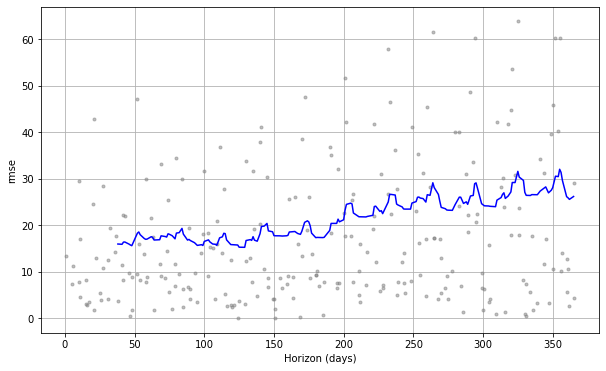

In [97]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric='rmse')

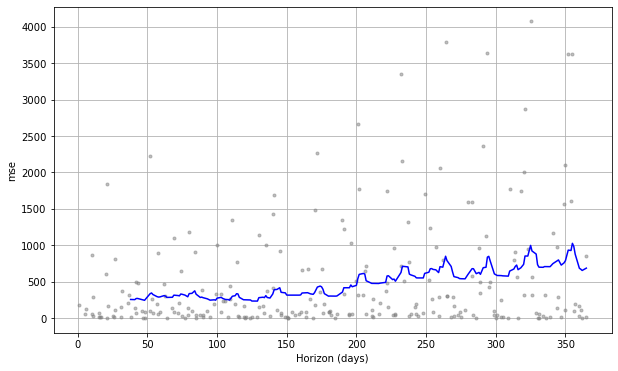

In [98]:
fig1 = plot_cross_validation_metric(df_cv,metric='mse')